## Instructions

Answer the questions below in the space provided. When you are finished, export your file to html and submit it on ELMS.

Be sure to include appopriate code AND a written response where necessary. 

In [3]:
from requests import get
import numpy as np
import pandas as pd

# Section I

## Question 1 (2pts)

The code below gives me an error message. What's wrong with it? Is there any way to fix it?

In [4]:
x = (1,2,3,4)
x[2] = 10

TypeError: 'tuple' object does not support item assignment

### <div style = 'background-color:skyblue'> <center> Question 1 Answer </div>

Your answer:

x is a tuple, and tuples are immutable in Python. We can convert x to a list and re-assign the value, then convert it back to a tuple.

In [5]:
# Your code:
x = list(x)
x[2] = 10
x = tuple(x)
x


(1, 2, 10, 4)

---

## Question 2 (4pts)
The Cook Political Report measures the "partisan lean" of U.S. Congressional districts. A figure like "R+10" indicates that a district is about 10 percentage points more Republican than the national average. And a figure like "D+10" means that a district is 10 points more Democratic. 

Write a **loop or list comprehension** that converts the values in the list below to numeric. **Districts that lean Republican should have a positive numeric value, and districts that lean more Democratic should have a negative value.** So "R+15" should become "15", and "D+15" becomes "-15"



In [6]:
cook_pvi = ['R+16', 'R+17','R+19','D+14','R+6','D+24','D+2','D+11']

### <div style = 'background-color:lightgreen'> <center> Question 2 Answer </div>


Answer: Multiple ways to do this. Here's a version that uses the `replace` method and wraps the result in `int` to convert the output to numeric:

In [7]:
# Your code:
[int(i.replace("D+", "-").replace("R+", "")) for i in  cook_pvi ]


[16, 17, 19, -14, 6, -24, -2, -11]

In [8]:
# or as a loop
outputs = []
for i in cook_pvi:
    numeric_lean = int(i.replace("D+", "-").replace("R+", ""))
    outputs.append(numeric_lean)


outputs


[16, 17, 19, -14, 6, -24, -2, -11]

---

## Question 3 (4pts)

The code below grabs some data about the 2024 Nobel Peace Prize from the Nobel Prize API. Take a minute to examine the response. How would I access the english language description of the `motivation` part of the `prize` data?

In [9]:
prize_data = get('https://api.nobelprize.org/2.0/nobelPrize/pea/2024')
prize = prize_data.json()


### <div style = 'background-color:pink'> <center> Question 3 Answer </div>

Your answer: The square brackets indicate that the result is inside a list (even though its a list of length 1), so we've got to go through 5 levels of nesting here to get to the right result:



In [11]:
# Your code:
prize[0]["laureates"][0]["motivation"]['en']

'for its efforts to achieve a world free of nuclear weapons and for demonstrating through witness testimony that nuclear weapons must never be used again'

---

# Section II

The code below will get data from the World Bank API on the total green house gas emissions for the US, China, and India since 1970. Here is a description of the variables included:

| Variable         | Description                                                                             |
|------------------|-----------------------------------------------------------------------------------------|
| country          | World Bank three letter country code. USA = The United States, CHN = China, IND = India |
| date             | The year for this observation. Ranges from 1970 to 2023                                 |
| carbon_emissions | Carbon dioxide emissions for this country in this year                                  |

In [12]:
# Extracting and formatting
url = 'https://api.worldbank.org/v2/country/US;CHN;IND/indicator/EN.GHG.CO2.MT.CE.AR5?format=json&per_page=200&date=1970:2024'
result= get(url)
result_dict = [{
        'country':i['countryiso3code'],
        'date': int(i['date']),
        'carbon_emissions': np.float64(i['value'])} for i in result.json()[1]]
emissions_df = pd.DataFrame(result_dict).sort_values(by='date').set_index('date', drop=False)


In [13]:
# viewing the first few rows
emissions_df.head()

,country,date,carbon_emissions
date,,,
1970,USA,1970,4595.0629
1970,CHN,1970,909.9762
1970,IND,1970,213.9344
1971,CHN,1971,913.4194
1971,IND,1971,214.4281


## Question 4 (2pts)
What is the **unit of analysis** for `emissions_df`? (Choose the best answer)

- A. Carbon emissions
- B. Country-Year
- C. World Bank Data
- D. None of these



### <div style = 'background-color:orange'> <center> Question 4 Answer </div>

Your answer: the unit of analysis is the country-year



In [2]:
# No code needed for this question

---

## Question 5 (4pts)

Which of these three countries has had the highest **total** carbon dioxide emissions since 1970? (in other words, you want to to find the sum `carbon_emissions` for China, the U.S. and India separately)

### <div style = 'background-color:yellow'> <center> Question 5 Answer </div>

Your answer: China is just barely ahead of the U.S. here. (although note that if we adjust for population size, the U.S. is still far ahead of China!)



In [14]:
# Your code:

emissions_df.groupby('country')['carbon_emissions'].sum()

country
CHN    277924.5070
IND     59485.1039
USA    276168.3197
Name: carbon_emissions, dtype: float64

---

## Question 6 (4pts)
Based on these data, have China's carbon dioxide emissions generally **increased** or **decreased** over time? How does China's trend compare with the overall trend for U.S. emissions? Provide one or more charts or tables to support your argument.

### <div style = 'background-color:lightgray'> <center> Question 6 Answer </div>

Your answer:

Emissions for India and China have both increased over time, with China's especially taking off in the 2000s. U.S. emissions are mostly flat, but they have decreased a small amount since their peak in the 2000s.

<AxesSubplot: xlabel='date'>

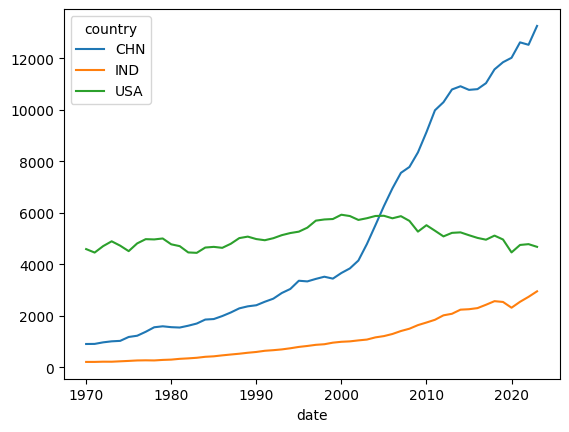

In [19]:
# Your code:
# Use a pivot to put the data in wide format, then plot lines
emissions_df.pivot(index='date', columns='country', values='carbon_emissions').plot.line()

---

## Question 7 (4pts)

**In the United States**, what year saw the greatest single-year drop in carbon emissions compared to the previous year?

(You can use the Pandas `shift` function (<a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html>documentation</a>) to get the prior-year values of `carbon_emissions`)


### <div style = 'background-color:bisque'> <center> Question 7 Answer </div>

Your answer:



In [39]:
# Your code:
emissions_us = emissions_df[emissions_df['country']=="USA"].copy()
emissions_us.loc[:, 'change_in_emissions']  =  emissions_us.carbon_emissions - emissions_us.carbon_emissions.shift(1)
emissions_us.sort_values(by='change_in_emissions').head()

,country,date,carbon_emissions,change_in_emissions
date,,,,
2020,USA,2020,4466.0428,-500.9082
2009,USA,2009,5273.3172,-416.2054
1982,USA,1982,4465.0384,-244.1960
1980,USA,1980,4780.4280,-226.4835
2012,USA,2012,5088.0151,-219.8996


You could also do this for all three countries using groupby:

In [46]:
emissions_df['change_in_emissions'] = emissions_df.groupby('country')['carbon_emissions'].shift(1)
emissions_df.loc[:, 'change_in_emissions']  =  emissions_df['carbon_emissions'] - emissions_df['change_in_emissions']
emissions_df.sort_values(by='change_in_emissions').head(10)

,country,date,carbon_emissions,change_in_emissions
date,,,,
2020,USA,2020,4466.0428,-500.9082
2009,USA,2009,5273.3172,-416.2054
1982,USA,1982,4465.0384,-244.1960
1980,USA,1980,4780.4280,-226.4835
2020,IND,2020,2318.9477,-223.0874
2012,USA,2012,5088.0151,-219.8996
2011,USA,2011,5307.9147,-213.8541
1975,USA,1975,4515.6160,-212.0652
2008,USA,2008,5689.5226,-183.4287


---

# Section III
The command below will load some selected data from the global terrorism database. The `gtd` data set below contains the following variables:

| Variable          | Description                                                                                                                                                  |
|-------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| country           | Country name                                                                                                                                                 |
| democracy_score   | 2020 liberal democracy score from the V-DEM project. Higher values indicate a higher level of democracy. Lower values mean less democratic.                  |
| oil               | ="oil production" if a country was an oil producer in 2020, = "no oil" if a country was not an oil producer in 2020                                          |
| terrorist_attacks | ="terrorist attack" if a country experienced a terrorist attack in 2020,  ="no terrorist attacks" if a country did not experience a terrorist attack in 2020 |


In [48]:
gtd = pd.read_csv("https://raw.githubusercontent.com/Neilblund/APAN/refs/heads/main/gtd_sample.csv")


## Question 8 (4pts)

Some social scientists argue that oil production makes countries less stable and more likely to experience terrorist attacks. 

Using the `gtd` data, produce a table or plot that shows the proportion/percent of oil producing countries that had terrorist attacks in 2020 compared to the proportion/percent of non-oil producing countries that had terrorist attacks in 2020. Do the results appear to support this claim?


### <div style = 'background-color:tomato'> <center> Question 8 Answer </div>

Your answer:
Probably the easiest way to see this is with a cross tab. But you want to make sure to normalize by the number of oil producing vs non-oil producing countries. So if `oil` is in the rows, we want to normalize on `index` and if `oil` is in the columns, we want to normalize on the columns. (remember: get percentages along whatever dimension includes your independent variable)

The results here suggest that oil producers are more likely to experience terrorist attacks: 34% vs. 66%



In [49]:
# Your code:
pd.crosstab(gtd['oil'], gtd['terrorist_attacks'], normalize='index')


terrorist_attacks,no terrorist attacks,terrorist attacks
oil,,
no oil,0.653846,0.346154
oil production,0.344828,0.655172


---

## Question 9 (4pts)

In addition to making countries less stable, many social scientists argue that oil production makes countries less democratic. Produce output, or a table or plot that shows the relationship between oil production and the level of democracy in a country. Briefly discuss your results


### <div style = 'background-color:violet'> <center> Question 9 Answer </div>

Your answer: You can use a `pivot_table` to aggregate `democracy_score` for oil vs. non-oil countries. Notably, the expected relationship here is reversed, although its also not very large in absolute terms. (the relationship here actually does show up if you use a continuous measure of oil production, but you didn't have that option here)



In [50]:
# Your code:
gtd.pivot_table(values = 'democracy_score',index ='oil', aggfunc='mean')


,democracy_score
oil,
no oil,0.371712
oil production,0.428509


---

You could also use a boxplot:

democracy_score    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

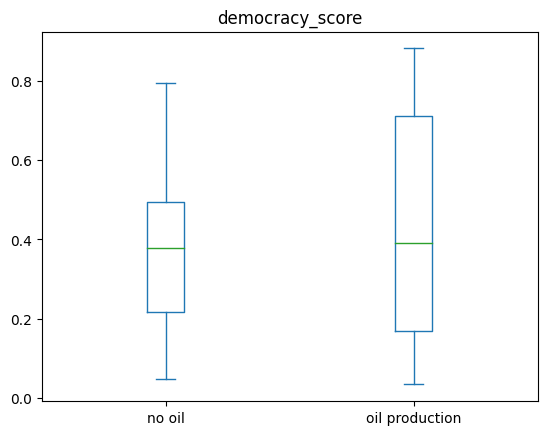

In [53]:
gtd.plot.box(column='democracy_score', by='oil')

Or `groupby()` with describe

In [54]:
gtd.groupby('oil').describe()

democracy_score                                              \
                         count      mean       std    min      25%     50%   
oil                                                                          
no oil                    52.0  0.371712  0.195474  0.047  0.21625  0.3795   
oil production           116.0  0.428509  0.280798  0.034  0.16875  0.3900   

                                
                    75%    max  
oil                             
no oil          0.49525  0.794  
oil production  0.71125  0.882